In [1]:
#-------------------------------------------------------------------------------------------------
# This is an exploration into how to make a physical robot arm draw a 3d-heart on a 2d surface
#
# 1. Import 3d-heart-model-coordinates from a 3d-program ex Houdini.
# 2. Load os as a list and transform/rotate heart
# 3. Convert points to g-code readable for the robot.
#
# Demonstration -  Robot drawing: https://www.youtube.com/watch?v=IIEznpPxKdE
#
#--------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
with open('heartlines.csv', 'r') as f:
    data = pd.read_csv(f)
print(data)

                 x      y             z
0     5.090000e-02 -0.935 -4.890000e-08
1    -1.630000e-07 -0.935 -1.828460e-02
2    -5.090000e-02 -0.935 -3.220000e-08
3    -1.490000e-07 -0.935  1.828450e-02
4     9.320000e-02 -0.870  6.491130e-02
...            ...    ...           ...
1439  5.112020e-02  1.210  8.130370e-01
1440  5.265250e-02  1.210  8.120490e-01
1441  5.354170e-02  1.210  8.034560e-01
1442  5.698070e-02  1.210  5.789230e-01
1443  5.232660e-02  1.210  5.691870e-01

[1444 rows x 3 columns]


In [3]:
def rotate3d(point,angley,anglex,anglez=0):
    rotation_x = [[1, 0, 0],
                  [0, math.cos(anglex), -math.sin(anglex)],
                  [0, math.sin(anglex), math.cos(anglex)]]

    rotation_y = [[math.cos(angley), 0, -math.sin(angley)],
                  [0, 1, 0],
                  [math.sin(angley), 0, math.cos(angley)]]

    rotation_z = [[math.cos(anglez), -math.sin(anglez), 0],
                  [math.sin(anglez), math.cos(anglez), 0],
                  [0, 0 ,1]]
    
    rotated_2d = np.matmul(rotation_y, point)
    rotated_2d = np.matmul(rotation_x, rotated_2d)
    #rotated_2d = np.matmul(rotation_z, point)
    
    return rotated_2d # returns 2d point

In [5]:
def prepareContourPlanes(dff):
    contoursArr = []
    contour = []
    start = []
    prev = []
    
    for index, row in data.iterrows():
        point = [row['x'],row['y'],row['z']]
        
        
        if len(contour) < 1:
            start = point
            prev = start
        
#         if abs(prev[0]-point[0]) > 0.1029999:
#             contour.append(start)
#             contoursArr.append(contour)
#             contour = []
#             start = point
#             prev = start
        
        if abs(prev[2]-point[2]) > 1:
            contour.append(start)
            contoursArr.append(contour)
            contour = []
            start = point
            prev = start
        
        if point[1] != prev[1]:
            contour.append(start)
            contoursArr.append(contour)
            contour = []
            start = point
            prev = start
        
        contour.append(point)
        prev=point
    return contoursArr

38
#9400D3
#9400D3
#9400D3
#9400D3
#9400D3
#9400D3
#4B0082
#4B0082
#4B0082
#4B0082
#4B0082
#0000FF
#0000FF
#0000FF
#0000FF
#0000FF
#00FF00
#00FF00
#00FF00
#00FF00
#00FF00
#FFFF00
#FFFF00
#FFFF00
#FFFF00
#FFFF00
#FF7F00
#FF7F00
#FF7F00
#FF7F00
#FF7F00
#FF0000
#FF0000
#FF0000
#FF0000
#FF0000
#FF0000
#FF0000


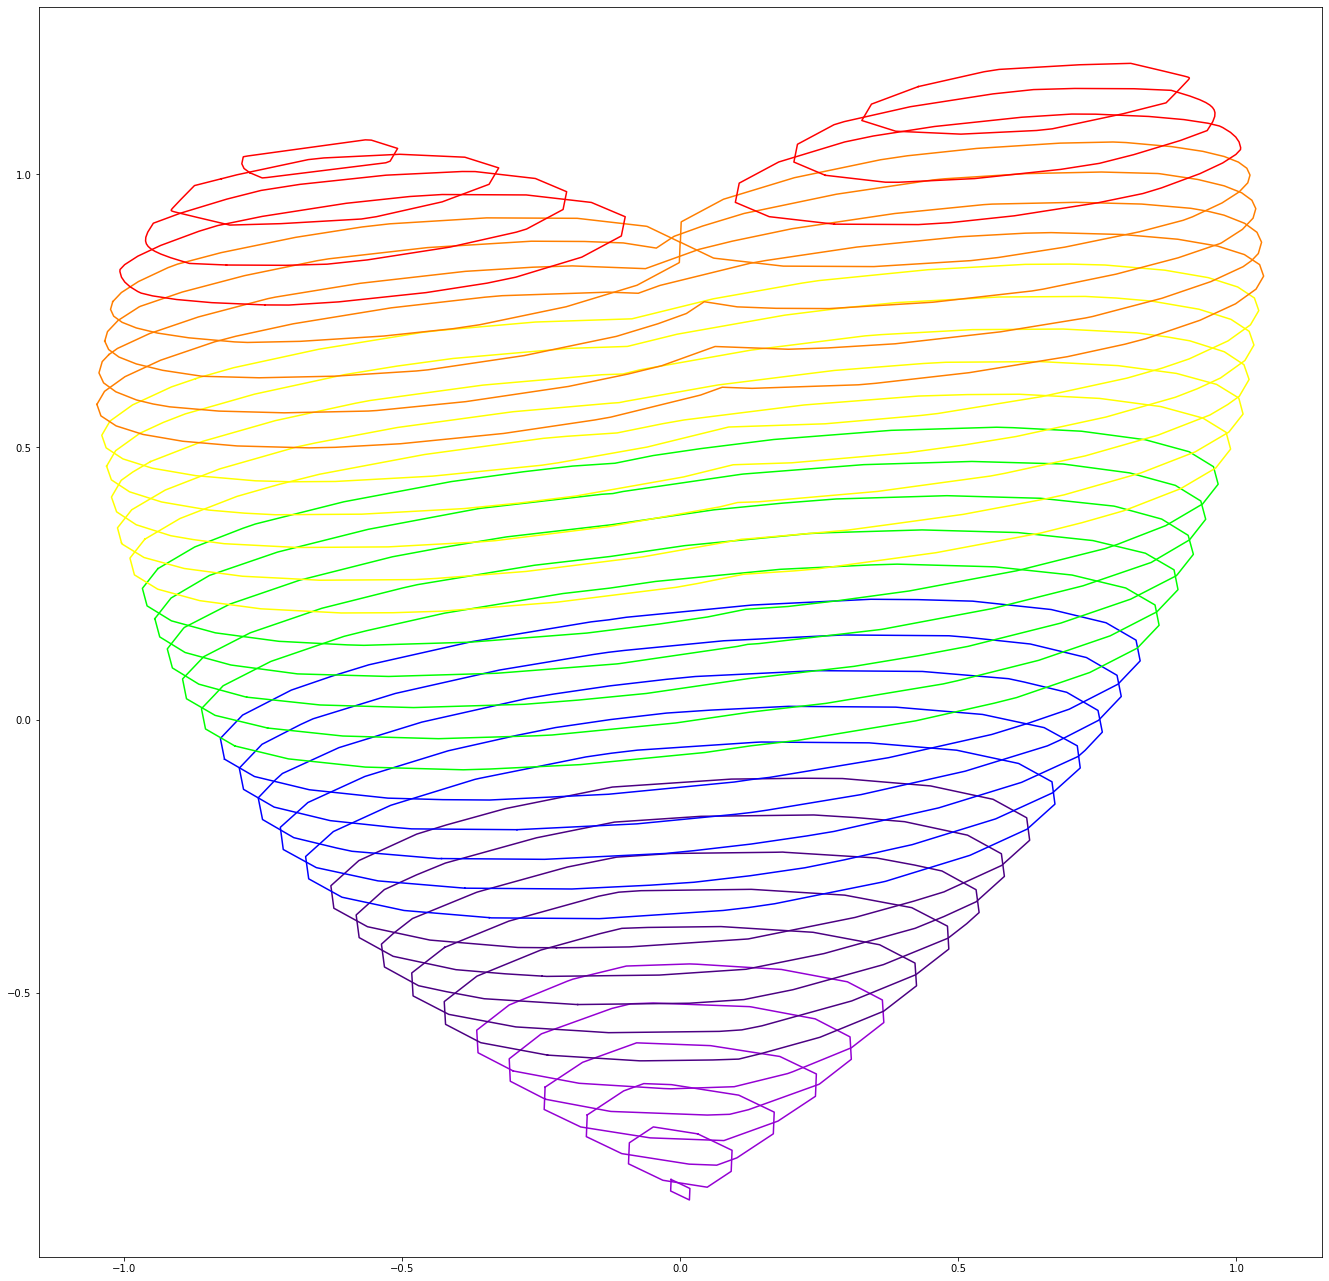

In [33]:
contours = prepareContourPlanes(data)
print(len(contours))
plt.figure(figsize=(23, 23))

colors = ['#9400D3','#4B0082','#0000FF','#00FF00','#FFFF00','#FF7F00','#FF0000']
anglex = -1.9
angley = 0.4
colorindex = 0

for i in range(len(contours)):
    X = []
    Y = []
    for point in contours[i]:
        point = rotate3d(point,anglex,angley)
        x = point[0]
        y = point[1]
        X.append(x)
        Y.append(y)
    plt.plot(X,Y,colors[colorindex])
    print(colors[colorindex])
    if i > 0 and i % 5 == 0:
        if colorindex <= 5:
            colorindex = colorindex+1
plt.show()


In [14]:
anglex = 2
angley = 0.3
scale = 55
skew = 300

xmin = 0
xmax = 0
ymin = 300
ymax = 0

for contour in contours:
    start = rotate3d(contour[0],anglex,angley)
    print(f'G0 X{start[0]*scale} Y{start[1]*scale+skew}')
    print('G0 Z0')
    for point in contour:
        point = rotate3d(point,anglex,angley)
        x = point[0]*scale
        y = point[1]*scale+skew
        if x > xmax:
            xmax = x
        if x < xmin:
            xmin = x
        if y > ymax:
            ymax = y
        if y < ymin:
            ymin = y
        print(f'G1 X{x} Y{y}')
    print('G0 Z10')
    
print(f'xmax: {xmax}')
print(f'xmin: {xmin}')
print(f'ymax: {ymax}')
print(f'ymin: {ymin}')

G0 X-1.1650006233582957 Y250.11955093606525
G0 Z0
G1 X-1.1650006233582957 Y250.11955093606525
G1 X0.9144414159359171 Y250.74814845181012
G1 X1.1650046792794682 Y251.62409060881475
G1 X-0.9144292737203541 Y250.99549757639488
G1 X-1.1650006233582957 Y250.11955093606525
G0 Z10
G0 X-5.3794709775456955 Y253.3487648166468
G0 Z0
G1 X-5.3794709775456955 Y253.3487648166468
G1 X-3.4308514841294557 Y252.07176589057553
G1 X1.1116872899872303 Y252.47016659302716
G1 X4.920231339884573 Y253.62170521734197
G1 X5.380354033759039 Y255.2261072898609
G1 X3.4308553950176885 Y256.5025315711679
G1 X-1.1116804235644273 Y256.10413583146243
G1 X-4.9202203626720795 Y254.9525959558414
G1 X-5.3794709775456955 Y253.3487648166468
G0 Z10
G0 X5.0005502109535165 Y255.30812188762076
G0 Z0
G1 X5.0005502109535165 Y255.30812188762076
G1 X-1.896369444150901 Y254.70572136657282
G1 X-4.6421108745505375 Y254.70495489367897
G1 X-6.4390050760688595 Y255.31688197379447
G1 X-9.401523046169471 Y257.25595809469314
G1 X-8.92602646189